## Scikit-Learn 맛보기
 - Iris 분류 - 결정트리, 서포터백터머신(SVM), 로지스틱 회귀

### 1. 데이터 전처리

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# Feature data - X, numpy dimesional array
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
type(iris.data)

numpy.ndarray

In [10]:
# Feature_names
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
feature_names = [name[:-5] for name in iris.feature_names]
print(feature_names)
df = pd.DataFrame(iris.data, columns=feature_names)
df.head()

['sepal length', 'sepal width', 'petal length', 'petal width']


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df['target'] = iris.target   # y data
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
import numpy as np
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [22]:
# 설명
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [24]:
df.groupby('target').describe()

sepal length                                             sepal width  \
              count   mean       std  min    25%  50%  75%  max       count   
target                                                                        
0              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

               ... petal length      petal width                             \
         mean  ...          75%  max       count   mean       std  min  25%   
target         ...                                                            
0       3.428  ...        1.575  1.9        50.0  0.246  0.105386  0.1  0.2   
1       2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   
2       2.974  ...        5.875  6.9        50.0  2.026  0.274650  1.4  1.8   

                       
        50%  75%  max  
target                 
0       0.2  0.3  0.6  
1       1.3  1.5  1.8  
2       2.0  2.3  2.5  

[3 rows x 32 columns]

In [25]:
df.groupby('target').agg(['mean', 'std'])

sepal length           sepal width           petal length            \
               mean       std        mean       std         mean       std   
target                                                                       
0             5.006  0.352490       3.428  0.379064        1.462  0.173664   
1             5.936  0.516171       2.770  0.313798        4.260  0.469911   
2             6.588  0.635880       2.974  0.322497        5.552  0.551895   

       petal width            
              mean       std  
target                        
0            0.246  0.105386  
1            1.326  0.197753  
2            2.026  0.274650

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# 마지막 -1은 타겟 빼고 가져오기 위함
setosa = df[df['target'] == 0].iloc[:, :-1]
print(setosa.shape)
setosa

(50, 4)


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


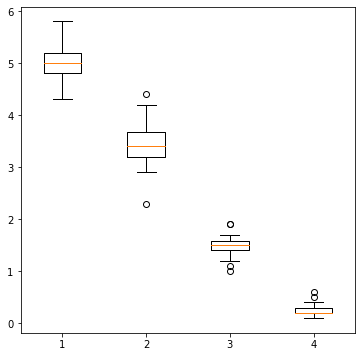

In [38]:
plt.figure(figsize=(6,6))
plt.boxplot(setosa.T)
plt.show()

In [39]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

2. 학습과 데스트 데이터로 분리

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=2021         # train : test = 3 : 1 비율
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [44]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([34, 36, 42]))

In [ ]:
# X데이터는 2차원이상이라 대문자, y는 1차원이라 소문자
X_train, y_train

In [46]:
# y값을 균등하게 뽀ㅃ으려면 stratify 옵션을 설정해주어야 함.
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target,random_state=2021         # train : test = 3 : 1 비율
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [47]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 37, 38]))

In [49]:
# test size 비율을 20%로 설정
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, test_size=0.2 , random_state=2021         # train : test = 3 : 1 비율
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### 3. 학습


 - 결정 트리(Decision Tree)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# 모델 생성 - 객체 생성
dtc = DecisionTreeClassifier(random_state=2022)


In [53]:
# 모델 하이퍼 파라메터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [54]:
# 학습(훈련)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

4. 예측

In [55]:
pred_dt = dtc.predict(X_test)

In [60]:
res = pd.DataFrame({'y' : y_test, 'DT':pred_dt})
res.head()

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0


### 5. 평가

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.9

In [63]:
# 4, 5번을 한꺼번에 수행
dtc.score(X_test, y_test)

0.9

### Support Vector Machines(SVM)

In [64]:
# 3) 모델 생성 및 학습
from sklearn.svm import SVC
svc = SVC(random_state=2022)
svc.fit(X_train, y_train)

SVC(random_state=2022)

In [68]:
pred_sv = svc.predict(X_test)
accuracy_score(y_test, pred_sv)

0.9

### Logistic Regression

In [72]:
# 3) 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state = 2022, max_iter=500)
lrc.fit(X_train, y_train)
pred_lrc = lrc.predict(X_test)
accuracy_score(y_test, pred_lrc)

0.9333333333333333

In [73]:
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=2022)

In [75]:
from sklearn.preprocessing import MinMaxScaler
iris_scaled = MinMaxScaler().fit_transform(iris.data)

In [76]:
iris_scaled[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [77]:
X_train2, X_test2, _, _ = train_test_split(iris_scaled, iris.target, stratify=iris.target,
                                           test_size=0.2 ,random_state=2022)
lrc2.fit(X_train2, y_train)

LogisticRegression(random_state=2022)

In [85]:
pred_sv2 = lrc2.predict(X_test2)
accuracy_score(y_test, pred_sv2)

0.1

In [86]:
dtc.score(X_test, y_test), svc.score(X_test, y_test), lrc.score(X_test, y_test)

(0.9, 0.9, 0.9333333333333333)

In [87]:
res['SV'] = pred_sv
res['LR'] = pred_lrc
res.head()

,y,DT,SV,LR
0,0,0,0,0
1,1,1,1,1
2,1,2,1,1
3,2,2,2,2
4,0,0,0,0


In [ ]:
res